In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression

In [2]:
mar19 = pd.read_csv("/Users/bridmcnulty/Desktop/listings.csv", low_memory=False)
feb19 = pd.read_csv("/Users/bridmcnulty/Desktop/feb2.csv", low_memory=False)
jan19 = pd.read_csv("/Users/bridmcnulty/Desktop/jan19.csv", low_memory=False)
dec18 = pd.read_csv("/Users/bridmcnulty/Desktop/dec18.csv", low_memory=False)
nov18 = pd.read_csv("/Users/bridmcnulty/Desktop/nov18.csv", low_memory=False)
oct18 = pd.read_csv("/Users/bridmcnulty/Desktop/oct18.csv", low_memory=False)
sep18 = pd.read_csv("/Users/bridmcnulty/Desktop/sep18.csv", low_memory=False)
aug18 = pd.read_csv("/Users/bridmcnulty/Desktop/aug18.csv", low_memory=False)
jul18 = pd.read_csv("/Users/bridmcnulty/Desktop/jul18.csv", low_memory=False)
may18 = pd.read_csv("/Users/bridmcnulty/Desktop/may18.csv", low_memory=False)
apr18 = pd.read_csv("/Users/bridmcnulty/Desktop/apr18.csv", low_memory=False)

In [3]:
# Need to create date field in each:

mar19['date'] = pd.to_datetime('2019-03')
feb19['date'] = pd.to_datetime('2019-02')
jan19['date'] = pd.to_datetime('2019-01')
dec18['date'] = pd.to_datetime('2018-12')
nov18['date'] = pd.to_datetime('2018-11')
oct18['date'] = pd.to_datetime('2018-10')
sep18['date'] = pd.to_datetime('2018-09')
aug18['date'] = pd.to_datetime('2018-08')
jul18['date'] = pd.to_datetime('2018-07')
may18['date'] = pd.to_datetime('2018-06')
apr18['date'] = pd.to_datetime('2018-05')

In [4]:
# Concatenating all Mar19 - Apr18 dataframes with just 'id' and 'availability_30' columns. June18 was missing on Inside AirBnB, so it's not here. Later, I will average July and May to create an estimated June file.

one_year = [mar19,feb19,jan19,dec18,nov18,oct18,sep18,aug18,jul18,may18,apr18]

one_year_less_june = pd.concat(one_year)
one_year_less_june.shape

/Users/bridmcnulty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


(600206, 107)

In [5]:
one_year_less_june.isnull().sum()

access                                          297881
accommodates                                         0
amenities                                        18436
availability_30                                      2
availability_365                                     2
availability_60                                      2
availability_90                                      2
bathrooms                                         2624
bed_type                                             0
bedrooms                                           866
beds                                              1419
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes     442662
calculated_host_listings_count_private_rooms    442662
calculated_host_listings_count_shared_rooms     442662
calendar_last_scraped                                0
calendar_updated                                     0
cancellation_policy                              18436
city      

In [6]:
removed_features= ['thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url',
 'host_picture_url','calendar_last_scraped','requires_license','license','jurisdiction_names','host_acceptance_rate',
 'market','smart_location','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
 'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','scrape_id',
'street','host_location', 'neighbourhood_group_cleansed','neighbourhood', 'host_neighbourhood',
 'state','city','weekly_price','monthly_price','square_feet','has_availability','zipcode','is_business_travel_ready','calculated_host_listings_count',
'country','country_code','listing_url','last_scraped','is_location_exact','calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_total_listings_count',
    'calendar_updated','number_of_reviews_ltm']

In [7]:
# Drop columns that don't care about / mostly null:

df = one_year_less_june.drop(columns=removed_features)

In [8]:
df.isnull().sum()

access                              297881
accommodates                             0
amenities                            18436
availability_30                          2
availability_365                         2
availability_60                          2
availability_90                          2
bathrooms                             2624
bed_type                                 0
bedrooms                               866
beds                                  1419
cancellation_policy                  18436
cleaning_fee                        212237
date                                     0
description                           4933
experiences_offered                  18436
extra_people                             0
first_review                        166952
guests_included                          0
host_about                          231751
host_has_profile_pic                 18732
host_id                                  0
host_identity_verified               18732
host_is_sup

In [9]:
series = df[['date','price']]

In [10]:
series['date'] = pd.to_datetime(series['date'])

series.set_index('date', inplace=True, drop=True)
series.index.name = None
series.head()

/Users/bridmcnulty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,price
2019-03-01,$65.00
2019-03-01,$100.00
2019-03-01,$500.00
2019-03-01,$175.00
2019-03-01,$65.00


In [11]:
type(series.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
# For cleaning use:

def remove_dollar(x):
    try:
        return float(x.replace('$', ''))
    except:
        return 0.00
series["price"] = series["price"].map(remove_dollar)



/Users/bridmcnulty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
series = series[['price']].resample('M').mean()

In [14]:
series

,price
2018-05-31,103.503634
2018-06-30,93.744787
2018-07-31,93.703864
2018-08-31,101.757489
2018-09-30,99.836419
2018-10-31,93.562617
2018-11-30,99.514333
2018-12-31,94.573276
2019-01-31,100.312215
2019-02-28,106.692610


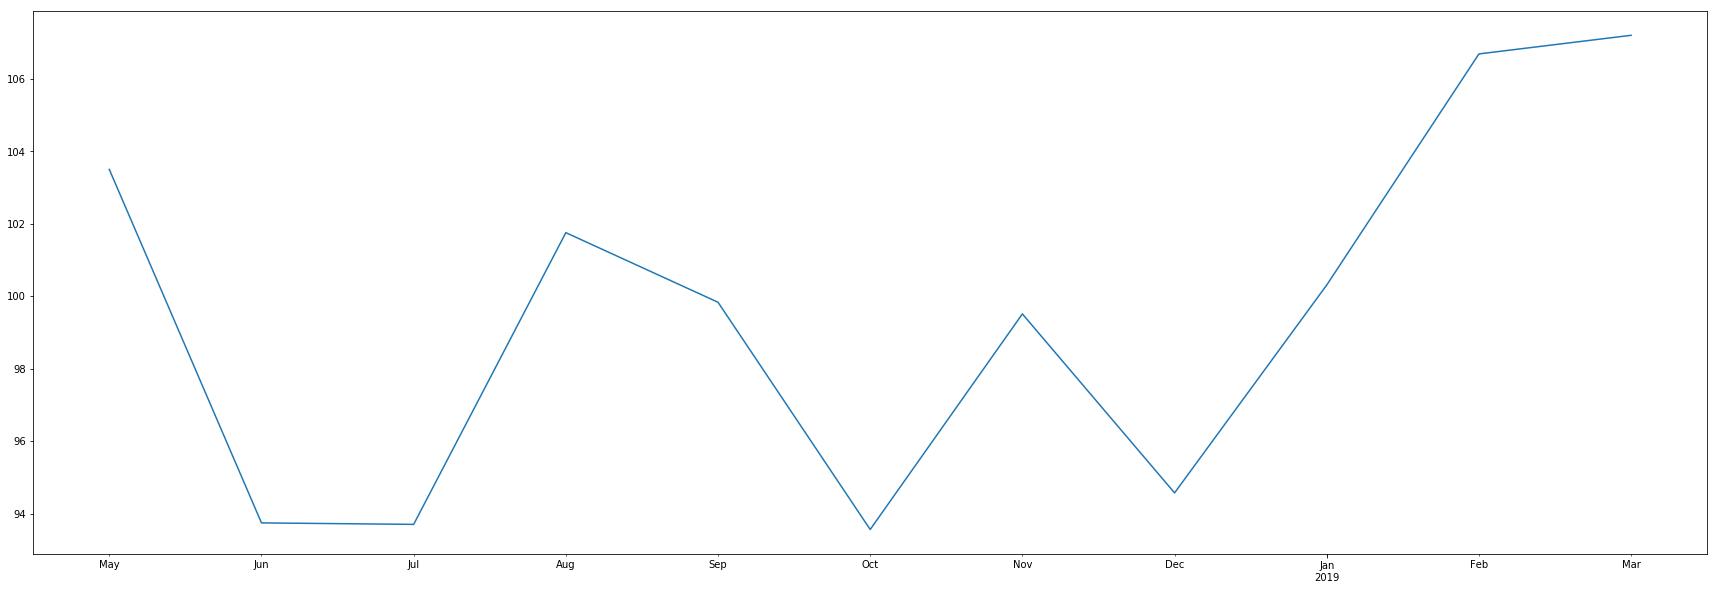

In [15]:
plt.figure(figsize=(30,10))
series.price.plot()
plt.show()

In [16]:
# Need data like listing 1 over 12 months...

df

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,summary,transit
0,Guest will have access to the self catering ki...,2,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",30.0,363.0,60.0,89.0,1.0,Real Bed,1.0,...,10.0,9.0,95.0,9.0,0.13,Private room,$100.00,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,The flat only a 10 minute walk to Finsbury Par...
1,There are two wardrobes for guests exclusive u...,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,104.0,8.0,8.0,1.0,Real Bed,1.0,...,10.0,10.0,95.0,9.0,0.72,Entire home/apt,$150.00,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,The underground stations are South Kensington ...
2,Full use of whole independent apartment,6,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",29.0,363.0,59.0,89.0,2.0,Real Bed,3.0,...,9.0,10.0,93.0,9.0,0.40,Entire home/apt,$350.00,Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...",You can walk to tourist London or take numerou...
3,- there is a communal garden in our complex - ...,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",0.0,325.0,20.0,50.0,1.5,Real Bed,2.0,...,10.0,9.0,98.0,9.0,0.91,Entire home/apt,$250.00,- End of terrace two bedroom house close to So...,"Artist house, high ceiling bedrooms, private p...","- 5 mins walk to Battersea Park, 15 mins walk ..."
4,Entire flat; use of communal gardens.,4,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",1.0,16.0,1.0,1.0,1.0,Real Bed,2.0,...,9.0,9.0,91.0,9.0,0.71,Entire home/apt,$250.00,10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",Free off-street parking; buses to Richmond/Too...
5,Fully equipped kitchen/ upstairs bathroom/ dow...,2,"{Wifi,Kitchen,""Buzzer/wireless intercom"",Heati...",6.0,179.0,19.0,19.0,1.5,Real Bed,1.0,...,10.0,9.0,95.0,9.0,1.09,Private room,$100.00,Big double Room to let up to 6 months or more....,Big room with double bed/ clean sheets/ clean ...,Brent Cross station 7 minutes away Heathrow is...
6,You will be sent you confirmation right away a...,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",4.0,329.0,24.0,54.0,1.0,Real Bed,1.0,...,9.0,9.0,85.0,8.0,0.60,Entire home/apt,$100.00,As my guest you will enjoy superb service and ...,Contemporary design meets classic London in th...,"The apartment is located on Upper Street, an e..."
7,They have access to the whole flat solely (the...,5,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",6.0,330.0,36.0,66.0,1.0,Real Bed,1.0,...,10.0,10.0,90.0,9.0,0.75,Entire home/apt,$100.00,As my guest you will enjoy superb service and ...,Contemporary design meets classic London in th...,"The apartment is located on Upper Street, an e..."
8,Use of all the shared areas of the flat: livin...,1,"{TV,Internet,Wifi,Kitchen,""Pets allowed"",Break...",28.0,363.0,58.0,88.0,1.0,Real Bed,1.0,...,8.0,9.0,76.0,9.0,0.05,Private room,$200.00,"This is a spare bedroom in a flat in Chelsea, ...","A single bedroom in a high-ceilinged, fully-eq...",The nearest underground station (Zones 1 and 2...
9,Shared front door and stairs.,2,"{Wifi,Kitchen,""Pets live on this property"",Cat...",28.0,363.0,58.0,88.0,1.0,Real Bed,1.0,...,10.0,10.0,85.0,7.0,0.04,Private room,NaN,This is a spacious Bedsit + En-Suite at the to...,"Walking distance to Twickenham Stadium, 35 min...","Buses, trains, underground."


In [17]:
clean = pd.read_csv("/Users/bridmcnulty/Desktop/cleaned_data.csv", low_memory=False)

In [19]:
clean.capped_or

AttributeError: 'DataFrame' object has no attribute 'capped_or'